In [47]:
from unittest import TestCase

import numpy as np

from GA import GA
from util import read_problem
import os
from time import time


class Test(TestCase):
    @staticmethod
    def testGA(pop_size):
        data_dir = 'data/instances_01_KP/large_scale'
        tbl_data = []
        solution_compare = {'ga_sol': [], 'ga_weight':[], 'actual_sol': [], 'actual_weight':[], 'found': [], 'time': []}
        for p in os.listdir(data_dir):
            print(p)
            w,u,max_w, sol = read_problem(os.path.join(data_dir, p))
            w = np.array(w)
            u = np.array(u)
            t = time()
            ga = GA(pop_size=pop_size, record_intermediate=True, debug=False)
            max_v, ga_sol, round = ga.solve(w, u, max_w)
            solution_compare['time'].append(time()-t)
            tbl_data.append(ga.epoch_info)
#             print(f"solution found by GA:\noptimal value: {max_v}\tweight: {sum(ga_sol * w)} \tround: {round}")
#             print(f"include items: {np.nonzero(ga_sol)}")
            solution_compare['actual_sol'].append(sum(sol*u))
            solution_compare['ga_sol'].append(sum(ga_sol*u))
            solution_compare['found'].append(round)
            solution_compare['ga_weight'].append(sum(ga_sol*w))
            solution_compare['actual_weight'].append(sum(sol*w))
            
        return tbl_data, solution_compare
#             print(f"solution given by the file")
#             print(np.nonzero(sol))
#             print(f"total weight: {sum(sol * w)}")
#             print(f"total utility: {sum(sol * u)}")

In [48]:
tbl_data, solution_compare = Test.testGA(pop_size=10)

knapPI_1_5000_1000_1
knapPI_2_100_1000_1
knapPI_2_2000_1000_1
knapPI_3_200_1000_1
knapPI_1_500_1000_1
knapPI_1_200_1000_1
knapPI_1_10000_1000_1
knapPI_1_2000_1000_1
knapPI_3_1000_1000_1
knapPI_2_5000_1000_1
knapPI_3_500_1000_1
knapPI_2_10000_1000_1
knapPI_3_2000_1000_1
knapPI_3_100_1000_1
knapPI_1_1000_1000_1
knapPI_3_10000_1000_1
knapPI_2_200_1000_1
knapPI_3_5000_1000_1
knapPI_2_1000_1000_1
knapPI_2_500_1000_1
knapPI_1_100_1000_1


In [50]:
# solution_compare

In [24]:
import matplotlib.pylab as plt
import seaborn as sn
import pandas as pd
sn.set()

In [51]:
a = tbl_data[0]

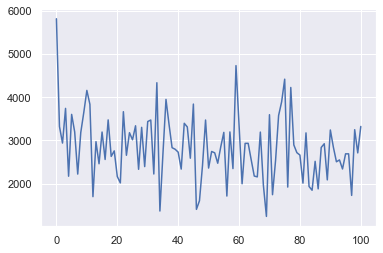

In [52]:
plt.plot(a['std'])

In [123]:
df.iloc[7]

ga_sol                                 94002
ga_weight                              10003
actual_sol                            110625
actual_weight                          10011
found                                     87
time                                 3.93061
file                    knapPI_1_2000_1000_1
deviation                              16623
percentage_deviation                0.150264
Name: 7, dtype: object

Text(0, 0.5, 'fitness')

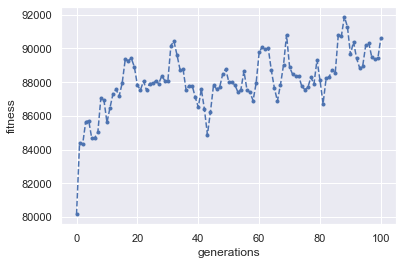

In [125]:
plt.plot(tbl_data[7]['avg'], '--.')
plt.xlabel("generations")
plt.ylabel("fitness")

In [105]:
df = pd.DataFrame(solution_compare)
df

,ga_sol,ga_weight,actual_sol,actual_weight,found,time
0,221927,24849,276457,25016,76,9.047390
1,1512,953,1514,991,24,0.271463
2,17022,10009,18051,10010,78,4.418864
3,2693,993,2697,997,84,0.453511
4,27553,2498,28857,2543,85,1.108400
5,11238,987,11238,987,4,0.479357
6,440860,49714,563647,49877,63,19.987224
7,94002,10003,110625,10011,87,3.930608
8,13376,4976,14390,4990,43,2.035377
9,41280,24999,44356,25016,99,10.280579


In [106]:
filenames = [
"knapPI_1_5000_1000_1",
"knapPI_2_100_1000_1",
"knapPI_2_2000_1000_1",
"knapPI_3_200_1000_1",
"knapPI_1_500_1000_1",
"knapPI_1_200_1000_1",
"knapPI_1_10000_1000_1",
"knapPI_1_2000_1000_1",
"knapPI_3_1000_1000_1",
"knapPI_2_5000_1000_1",
"knapPI_3_500_1000_1",
"knapPI_2_10000_1000_1",
"knapPI_3_2000_1000_1",
"knapPI_3_100_1000_1",
"knapPI_1_1000_1000_1",
"knapPI_3_10000_1000_1",
"knapPI_2_200_1000_1",
"knapPI_3_5000_1000_1",
"knapPI_2_1000_1000_1",
"knapPI_2_500_1000_1",
"knapPI_1_100_1000_1"]

In [107]:
df["file"] = filenames
df['deviation'] = df['actual_sol'] - df['ga_sol']
df['percentage_deviation'] = df['deviation'] / df['actual_sol']

In [109]:
df.head()

,ga_sol,ga_weight,actual_sol,actual_weight,found,time,file,deviation,percentage_deviation
0,221927,24849,276457,25016,76,9.047390,knapPI_1_5000_1000_1,54530,0.197246
1,1512,953,1514,991,24,0.271463,knapPI_2_100_1000_1,2,0.001321
2,17022,10009,18051,10010,78,4.418864,knapPI_2_2000_1000_1,1029,0.057005
3,2693,993,2697,997,84,0.453511,knapPI_3_200_1000_1,4,0.001483
4,27553,2498,28857,2543,85,1.108400,knapPI_1_500_1000_1,1304,0.045188


In [110]:
print(df[['file','ga_sol', 'actual_sol', 'percentage_deviation']].to_latex(index=False, float_format="%.2f"))

\begin{tabular}{lrrr}
\toprule
                  file &  ga\_sol &  actual\_sol &  percentage\_deviation \\
\midrule
  knapPI\_1\_5000\_1000\_1 &  221927 &      276457 &                  0.20 \\
   knapPI\_2\_100\_1000\_1 &    1512 &        1514 &                  0.00 \\
  knapPI\_2\_2000\_1000\_1 &   17022 &       18051 &                  0.06 \\
   knapPI\_3\_200\_1000\_1 &    2693 &        2697 &                  0.00 \\
   knapPI\_1\_500\_1000\_1 &   27553 &       28857 &                  0.05 \\
   knapPI\_1\_200\_1000\_1 &   11238 &       11238 &                  0.00 \\
 knapPI\_1\_10000\_1000\_1 &  440860 &      563647 &                  0.22 \\
  knapPI\_1\_2000\_1000\_1 &   94002 &      110625 &                  0.15 \\
  knapPI\_3\_1000\_1000\_1 &   13376 &       14390 &                  0.07 \\
  knapPI\_2\_5000\_1000\_1 &   41280 &       44356 &                  0.07 \\
   knapPI\_3\_500\_1000\_1 &    6914 &        7117 &                  0.03 \\
 knapPI\_2\_10000\_1000\_

In [111]:
# print(df.to_latex())

In [126]:
print(df[['file','found', 'ga_weight', 'actual_weight','time']].to_latex(index=False, float_format="%.2f"))

\begin{tabular}{lrrrr}
\toprule
                  file &  found &  ga\_weight &  actual\_weight &  time \\
\midrule
  knapPI\_1\_5000\_1000\_1 &     76 &      24849 &          25016 &  9.05 \\
   knapPI\_2\_100\_1000\_1 &     24 &        953 &            991 &  0.27 \\
  knapPI\_2\_2000\_1000\_1 &     78 &      10009 &          10010 &  4.42 \\
   knapPI\_3\_200\_1000\_1 &     84 &        993 &            997 &  0.45 \\
   knapPI\_1\_500\_1000\_1 &     85 &       2498 &           2543 &  1.11 \\
   knapPI\_1\_200\_1000\_1 &      4 &        987 &            987 &  0.48 \\
 knapPI\_1\_10000\_1000\_1 &     63 &      49714 &          49877 & 19.99 \\
  knapPI\_1\_2000\_1000\_1 &     87 &      10003 &          10011 &  3.93 \\
  knapPI\_3\_1000\_1000\_1 &     43 &       4976 &           4990 &  2.04 \\
  knapPI\_2\_5000\_1000\_1 &     99 &      24999 &          25016 & 10.28 \\
   knapPI\_3\_500\_1000\_1 &     74 &       2514 &           2517 &  1.14 \\
 knapPI\_2\_10000\_1000\_1 &     76 &

## experiemt with pop size 100

In [127]:
tbl_data, solution_compare = Test.testGA(pop_size=100)

knapPI_1_5000_1000_1
knapPI_2_100_1000_1
knapPI_2_2000_1000_1
knapPI_3_200_1000_1
knapPI_1_500_1000_1
knapPI_1_200_1000_1
knapPI_1_10000_1000_1
knapPI_1_2000_1000_1
knapPI_3_1000_1000_1
knapPI_2_5000_1000_1
knapPI_3_500_1000_1
knapPI_2_10000_1000_1
knapPI_3_2000_1000_1
knapPI_3_100_1000_1
knapPI_1_1000_1000_1
knapPI_3_10000_1000_1
knapPI_2_200_1000_1
knapPI_3_5000_1000_1
knapPI_2_1000_1000_1
knapPI_2_500_1000_1
knapPI_1_100_1000_1


In [128]:
df = pd.DataFrame(solution_compare)
df.head()

,ga_sol,ga_weight,actual_sol,actual_weight,found,time
0,234227,24895,276457,25016,91,93.592772
1,1512,953,1514,991,4,2.150111
2,17506,9994,18051,10010,83,39.786512
3,2696,996,2697,997,2,4.362615
4,28834,2528,28857,2543,28,10.496579


In [129]:
df["file"] = filenames
df['deviation'] = df['actual_sol'] - df['ga_sol']
df['percentage_deviation'] = df['deviation'] / df['actual_sol']

In [130]:
print(df[['file','ga_sol', 'actual_sol', 'percentage_deviation']].to_latex(index=False, float_format="%.2f"))

\begin{tabular}{lrrr}
\toprule
                  file &  ga\_sol &  actual\_sol &  percentage\_deviation \\
\midrule
  knapPI\_1\_5000\_1000\_1 &  234227 &      276457 &                  0.15 \\
   knapPI\_2\_100\_1000\_1 &    1512 &        1514 &                  0.00 \\
  knapPI\_2\_2000\_1000\_1 &   17506 &       18051 &                  0.03 \\
   knapPI\_3\_200\_1000\_1 &    2696 &        2697 &                  0.00 \\
   knapPI\_1\_500\_1000\_1 &   28834 &       28857 &                  0.00 \\
   knapPI\_1\_200\_1000\_1 &   11238 &       11238 &                  0.00 \\
 knapPI\_1\_10000\_1000\_1 &  456254 &      563647 &                  0.19 \\
  knapPI\_1\_2000\_1000\_1 &  102992 &      110625 &                  0.07 \\
  knapPI\_3\_1000\_1000\_1 &   13971 &       14390 &                  0.03 \\
  knapPI\_2\_5000\_1000\_1 &   42101 &       44356 &                  0.05 \\
   knapPI\_3\_500\_1000\_1 &    7016 &        7117 &                  0.01 \\
 knapPI\_2\_10000\_1000\_

In [131]:
print(df[['file','found', 'ga_weight', 'actual_weight','time']].to_latex(index=False, float_format="%.2f"))

\begin{tabular}{lrrrr}
\toprule
                  file &  found &  ga\_weight &  actual\_weight &   time \\
\midrule
  knapPI\_1\_5000\_1000\_1 &     91 &      24895 &          25016 &  93.59 \\
   knapPI\_2\_100\_1000\_1 &      4 &        953 &            991 &   2.15 \\
  knapPI\_2\_2000\_1000\_1 &     83 &       9994 &          10010 &  39.79 \\
   knapPI\_3\_200\_1000\_1 &      2 &        996 &            997 &   4.36 \\
   knapPI\_1\_500\_1000\_1 &     28 &       2528 &           2543 &  10.50 \\
   knapPI\_1\_200\_1000\_1 &      9 &        987 &            987 &   4.21 \\
 knapPI\_1\_10000\_1000\_1 &     37 &      49726 &          49877 & 202.95 \\
  knapPI\_1\_2000\_1000\_1 &     77 &       9998 &          10011 &  39.80 \\
  knapPI\_3\_1000\_1000\_1 &     75 &       4971 &           4990 &  19.46 \\
  knapPI\_2\_5000\_1000\_1 &     33 &      24999 &          25016 &  99.27 \\
   knapPI\_3\_500\_1000\_1 &     14 &       2516 &           2517 &   9.80 \\
 knapPI\_2\_10000\_1000\_

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:

from TSPGA import get_problem2, TSPGA
problem = get_problem2()

# print(len(problem))
ga = TSPGA(pop_size=300, max_iter=300, p_c=0.5, p_m=0.5, debug=False,greedy_intialize_population=True, selection_method='rws', tournament_size =2, record_intermediate=True)
# ga = TSPGA(pop_size=5000, max_iter=300, p_c=0.2, p_m=0.5)
min_dist, sol, round_found = ga.solve(problem)

#   ga = TSPGA(pop_size=100, max_iter=10000, p_c=0.5, p_m=0.5, greedy_intialize_population=False, selection_method='tournament', tournament_size=2,debug=False)

# print(f"minimum distance of tour according to solution: {get_min_distance(ga.M, tour)}")

print(f"min dist: {min_dist}")
# print(f"found tour (start index 1): {sol + 1}")
print(f"found at round: {round_found}")


min dist: 3099.631537437439
found at round: 276


In [14]:
from util import read_tsp_solution
import os

In [15]:
file_name = 'a280'
data_dir = 'data/tsp'
solution_name = 'a280_optimal'
tour = read_tsp_solution(os.path.join(data_dir, solution_name))
# problem = read_problem_tsp(os.path.join(data_dir, file_name))
# problem = np.array(problem)

In [17]:
tour = np.array(tour)-1

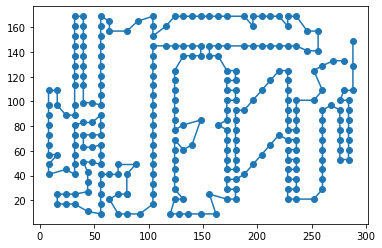

In [18]:
plot_solution(problem, tour)

In [8]:
def plot_solution(problem, sol):
    x = problem[sol][:,1:][:,0]
    y = problem[sol][:,1:][:,1]
    plt.plot(x,y, 'o-')

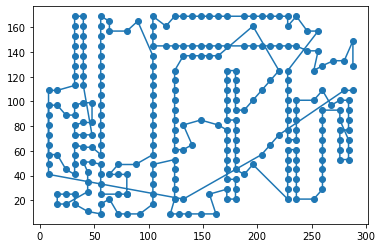

In [11]:
plot_solution(problem, sol)

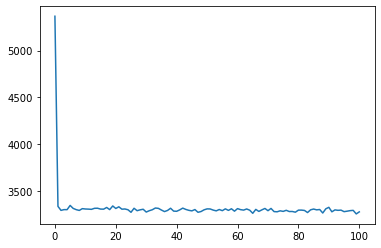

In [33]:
plt.plot(ga.epoch_info['avg'])

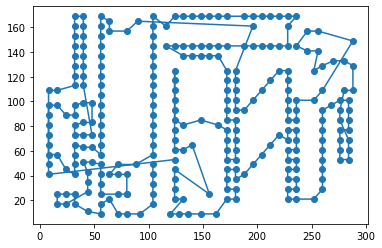

In [26]:
x = problem[sol][:,1:][:,0]
y = problem[sol][:,1:][:,1]
plt.plot(x,y, 'o-')

In [27]:
ga.epoch_info

{'std': [], 'avg': []}

In [14]:
x,y = list(zip(problem[sol][1:]))
plt.plot(x,y, 'o-')

ValueError: too many values to unpack (expected 2)